# Calculating the Minimum Thickness of a Sapphire Window Fixed At Both Ends 

## Inputs

## Governing Equations - Distributed Load, Fixed at Both Ends
![Alt text](Beam%20Fixed%20at%20Both%20Ends%20-%20Uniform%20Continuous%20Distributed%20Load.PNG)
### Sapphire Material Properties
Yield Strenght: $\sigma = 300MPa$ <br>
Modulus of Elasticity: $E = 400GPa$
### Moment Diagram (Nm)
$$M(x) = -\frac{w}{12}\Bigg(L^2-6x(L-x)\Bigg)$$
### Deflection Diagram
$$y = \frac{1}{EI}\Bigg[-\frac{wL^2x^2}{24}+\frac{wLx^3}{12}-\frac{wx^4}{24}\Bigg]$$
### Factor of Safety
From Yoder 4.2.2 - Nasa's STD-5001 recommends $$SF>=3$$
From Yoder 4.2.2 - If subject to pitting/scratching add SF of x2 
$$\therefore SF=6$$
### Stress
$$I = \frac{1}{12}bh^3$$
$$\sigma = \frac{My}{I}$$
Stress is maximized when y is maximized. "y" is the distance from the neutral axis to the edge of the window. $$\therefore y=h/2$$
Where h = window thickness
Solving for Window Thickness: $$h = \sqrt[2]{\frac{6M}{b\sigma}}$$
### Weibull Failure Probability
Note: The two-parameter Weibull distribution is extremely conservative at small values of failure probability $P_f$ ≤ $10^{−3}$ which are required for optical systems.
Assume that the probability of failure is 1000 in 1,000,000 or $$P_f=0.001$$
From Yoder Table 3.3: $$m = 4.1$$ $$\sigma_0 = 600MPa$$
Non-modified
$$P_f = 1-exp\Bigg(-\frac{\sigma}{\sigma_0}\Bigg)^m$$
Re-arranged for: $\sigma$
$$\sigma = -\sigma_0*\ln(\sqrt[m]{1-P_f})$$
Modified to Scale with Area
$$P_f = 1 - exp\Bigg[-\frac{A}{A_0}\Bigg(\frac{\sigma}{\sigma_0}\Bigg)^m\Bigg]$$



In [49]:
L = 0.05 #Unsupported Width (m)
F = -100 #Max Applied Load(N) -> Based on what a human would exert on the sapphire window when cleaning
w = F/L #Distributed Load(N/m) -> Load per meter across the L span of the window
# h = None #Depth (thickness) of window
b = 0.1 #Length of window (Long edge) (m)
E = 400,000,000,000 #Modulus of Elasticity (Pa)
sigma = 300,000,000 #Yeild Strength (Pa)


# Bending Moment

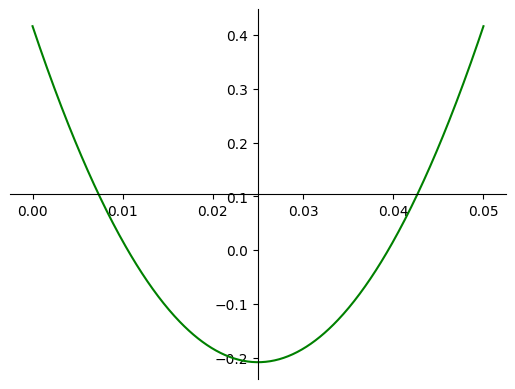

The maximum Bending Moment is: 0.41666666666666674 Nm


In [50]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(0,L,500)

# the function, See "Moment Diagram"
M = -(w/12)*((L**2)-6*x*(L-x))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#print(x)

# plot the function
plt.plot(x,M, 'g')

#print(y)
# show the plot
plt.show()

print("The maximum Bending Moment is:",max(M,key=abs),"Nm")

# Minimum Window Thickness

In [51]:
maxM = max(M,key=abs)